In [7]:
%matplotlib inline
import glob
import os
import os.path as osp
from collections import defaultdict
from typing import Dict

import matplotlib
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm_notebook as tqdm

plt.rcParams['text.usetex'] = False

In [17]:
def parse_events_file(path: str) -> Dict:
    metrics = defaultdict(list)
    try:
        for e in tqdm(tf.train.summary_iterator(path)):
            for v in e.summary.value:
                if isinstance(v.simple_value, float):
                    metrics[v.tag].append((v.simple_value, e.step))
    except:
        return metrics
    return metrics

def plot_metrics(metrics: Dict) -> None:
    for key, values in metrics.items():
        x_vals = [v[0] for v in values]
        y_vals = [v[1] for v in values]

        x_vals = np.around(x_vals, decimals=2)
        y_vals = np.around(y_vals, decimals=2)

        fig, ax = plt.subplots(figsize=(8,4))#, dpi=150)
        plt.plot(y_vals, x_vals)
        plt.title(key)
        plt.show()

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_1/09_30_egta_dqn_att_epoch1.best_response


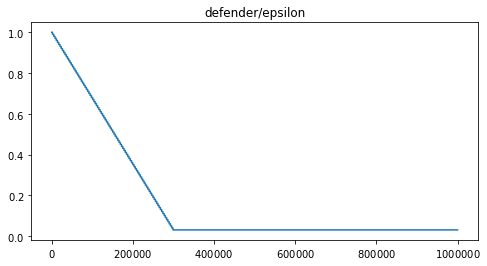

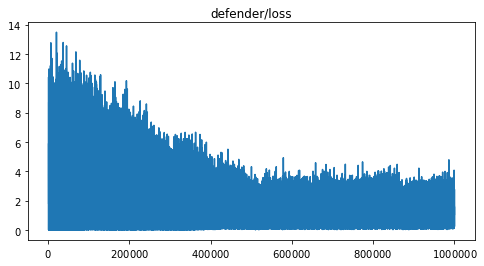

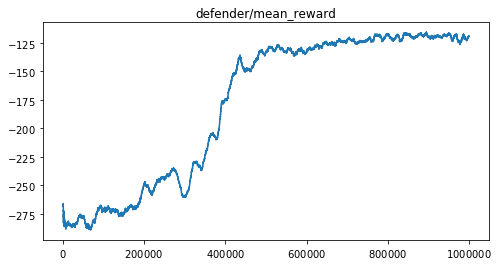

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_1/09_30_egta_dqn_att_epoch3.best_response


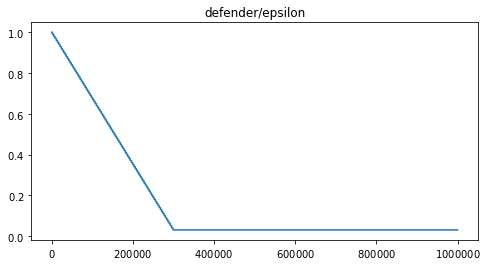

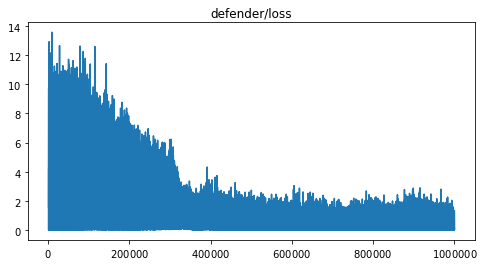

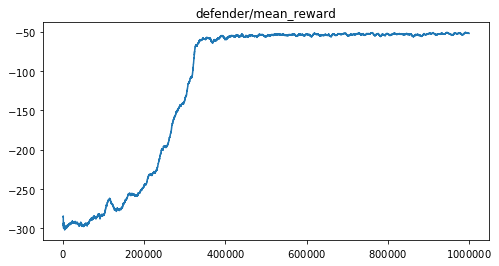

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_1/09_30_egta_dqn_att_epoch7.best_response


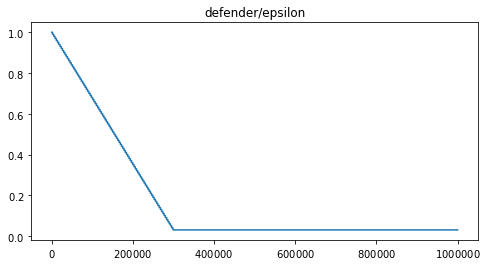

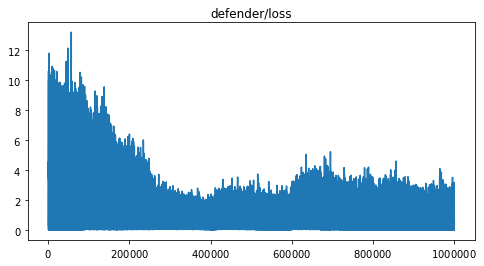

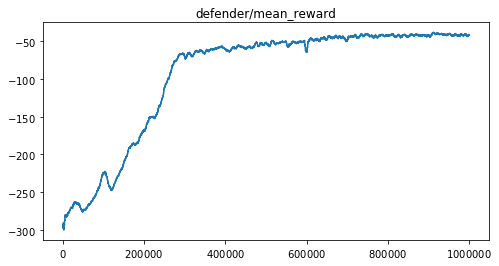

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_1/mixture.best_response


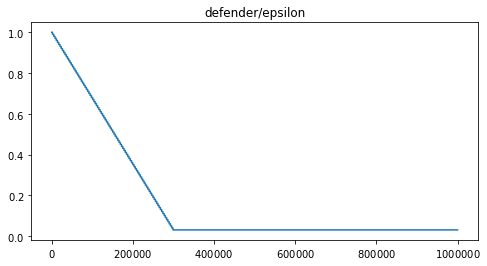

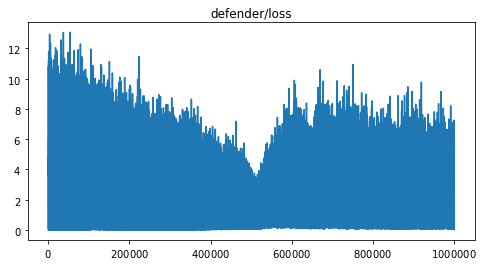

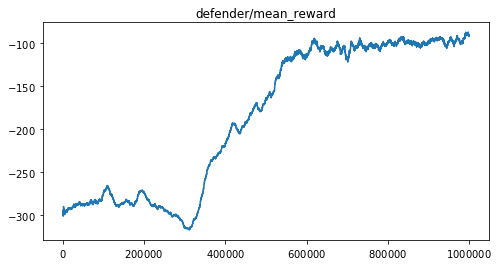

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_2/09_30_egta_dqn_att_epoch1.best_response


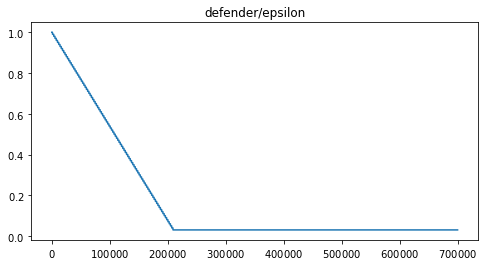

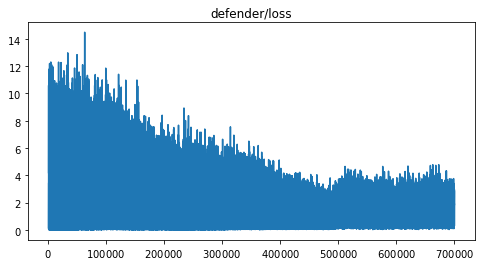

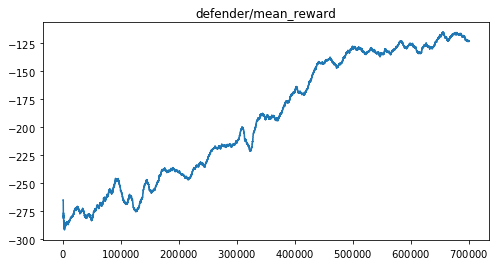

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_2/09_30_egta_dqn_att_epoch3.best_response


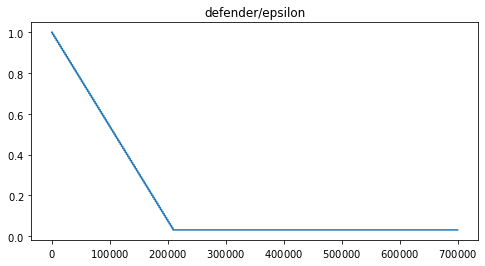

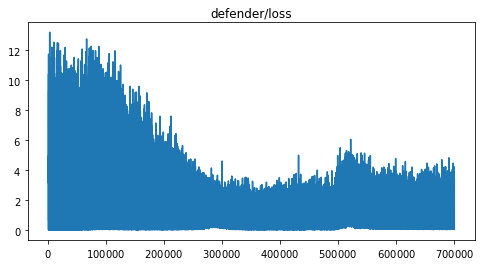

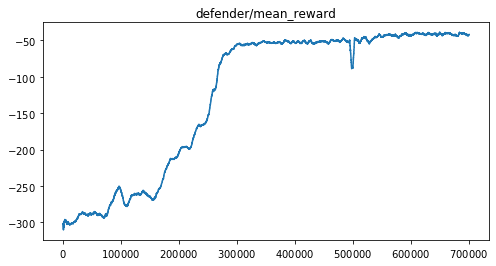

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_2/09_30_egta_dqn_att_epoch7.best_response


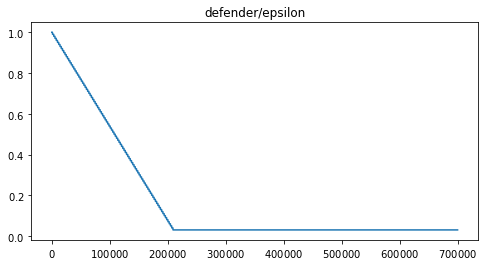

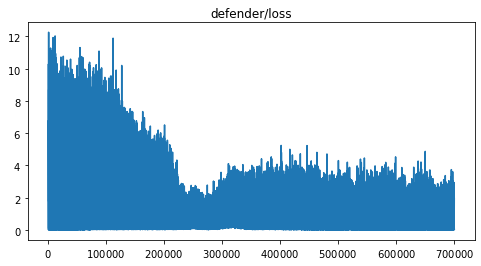

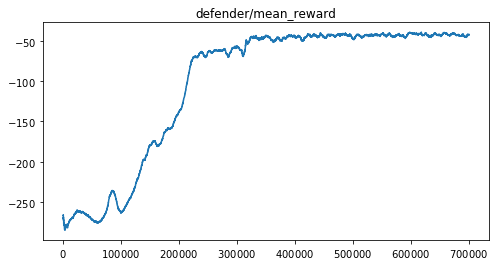

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_2/mixture.best_response


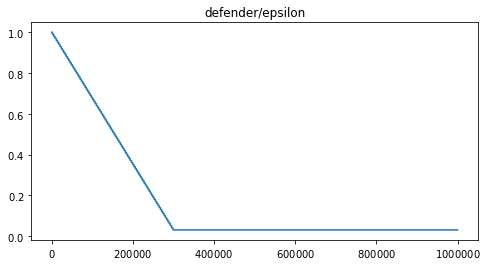

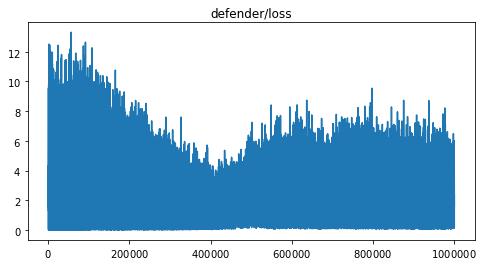

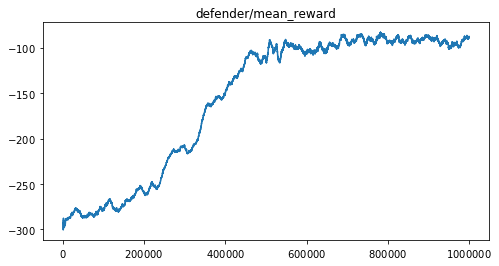

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_3/09_30_egta_dqn_att_epoch1.best_response


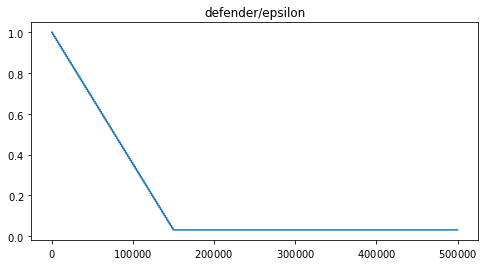

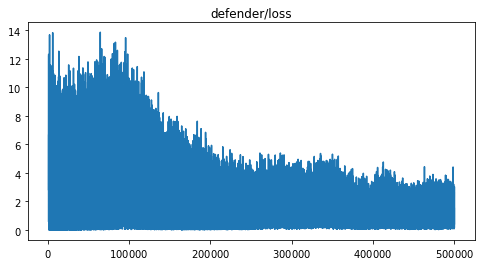

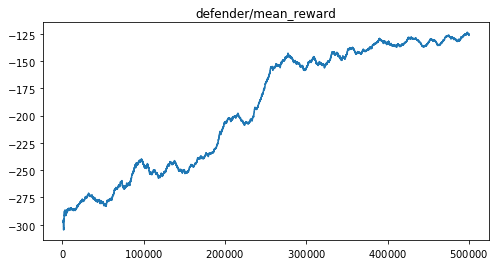

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_3/09_30_egta_dqn_att_epoch3.best_response


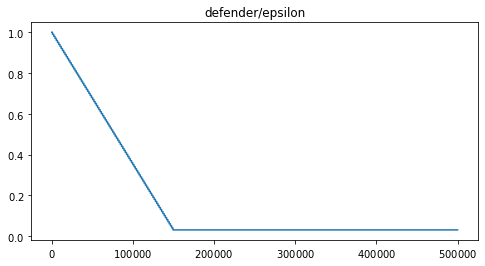

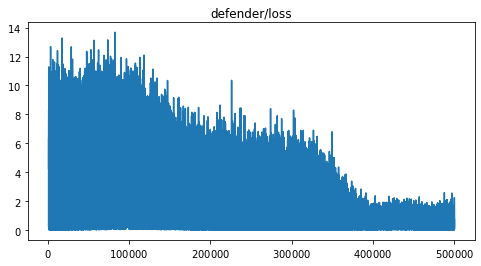

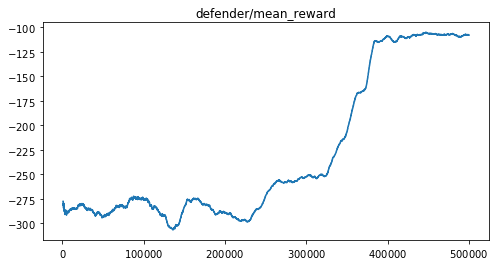

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_3/09_30_egta_dqn_att_epoch7.best_response


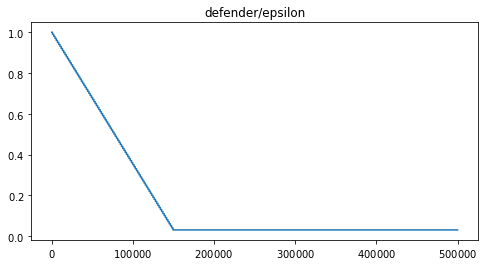

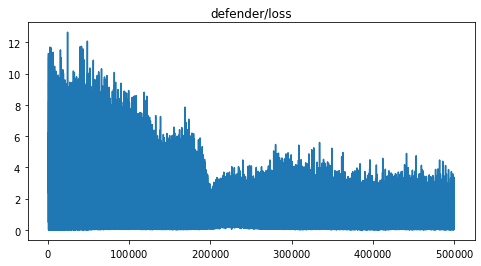

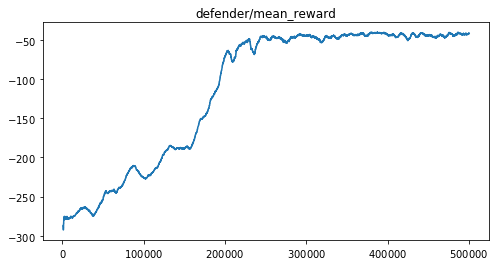

/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_3/mixture.best_response


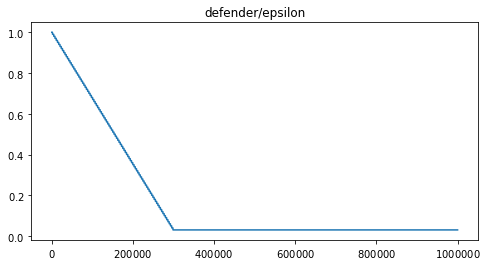

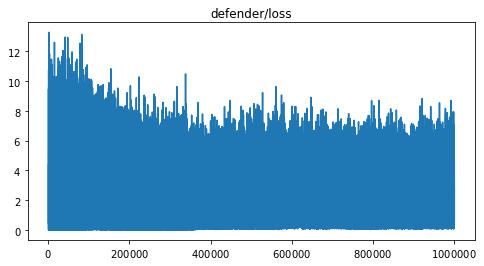

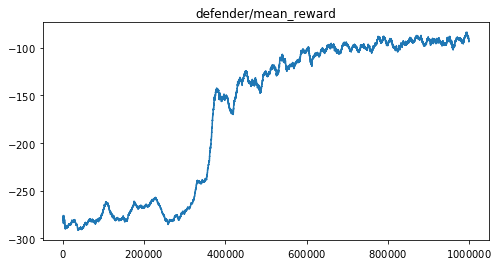

In [22]:
result_dir = "/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_{}"
result_dirs = [result_dir.format(i) for i in [1, 2, 3]]
opponent_dirs = [
    "09_30_egta_dqn_att_epoch1.best_response", 
    "09_30_egta_dqn_att_epoch3.best_response",
    "09_30_egta_dqn_att_epoch7.best_response",
    "mixture.best_response"]

for result_dir in result_dirs:
    for opponent in opponent_dirs:
        path = osp.join(result_dir, opponent)
        print(path)
        event_file = glob.glob(osp.join(path, "events.*"))[0]
            
        try:
            metrics = parse_events_file(event_file)
            plot_metrics(metrics)
        except:
            pass

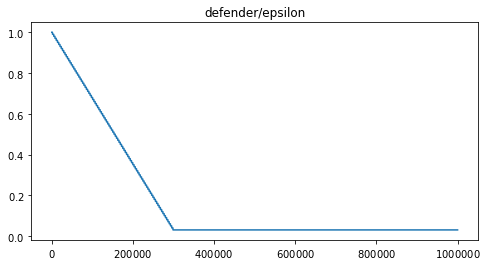

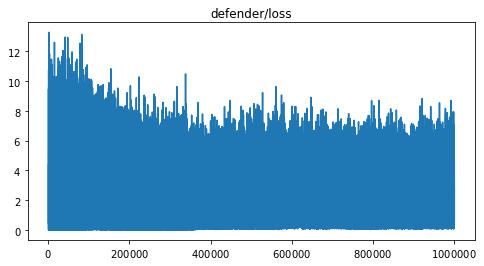

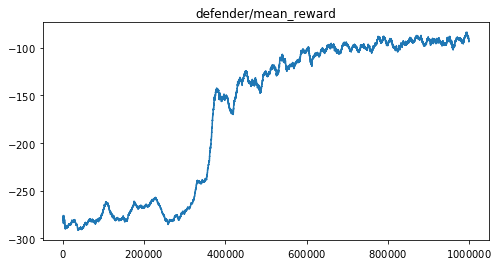

In [21]:
path = "/home/mxsmith/projects/attack_graph/results/01_06_qmix_explore_def_3/mixture.best_response"
path = glob.glob(osp.join(path, "events.*"))[0]

metrics = parse_events_file(path)
plot_metrics(metrics)